## Evaluation of the best model day by day

This notebook is used to do the evaluation of the best model, but one day at the time. This is done by separating the simplify data frame with the labels made by the technician by day.

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import pickle

from sklearn.preprocessing import StandardScaler, Normalizer 
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix

import sys
sys.path.append('../Library')

import breedManip as breedManip
import dataProcessing as dataProcessing
import breeds as breeds
import splitData as splitData

import importlib
importlib.reload(splitData)

<module 'splitData' from '/mnt/remote/workspaces/magali.egger/TBproject/Travail_Bachelor/ClassificationSimple/../Library/splitData.py'>

In [61]:
with open('/home/magali.egger/workspace/TBproject/Travail_Bachelor/Data/rfc_best.pkl', 'rb') as file:
    clf = pickle.load(file)

In [62]:
with open('/home/magali.egger/workspace/TBproject/Travail_Bachelor/Data/df_simplify_labels.pkl', 'rb') as f:
    df_simplify_labels = pickle.load(f)

In [63]:
# remove wierd labels
wierd_labels = ['a', '8', 's', 'j', '1', '2', '3']
df_simplify_labels = df_simplify_labels[~df_simplify_labels['label'].isin(wierd_labels)]

In [64]:
df_simplify_labels = df_simplify_labels.drop(columns=['mouse'])
df_simplify_labels = df_simplify_labels.drop(columns=['breed'])

Preparing the data for the different days

In [65]:
df_simplify_labels_day0 = df_simplify_labels[df_simplify_labels['day'] == 0]
df_simplify_labels_day1 = df_simplify_labels[df_simplify_labels['day'] == 1]
df_simplify_labels_day2 = df_simplify_labels[df_simplify_labels['day'] == 2]
df_simplify_labels_day3 = df_simplify_labels[df_simplify_labels['day'] == 3]

In [66]:
x_test_day0, y_test_raw_day0 = splitData.split_labels_annotated(df_simplify_labels_day0)
x_test_day1, y_test_raw_day1 = splitData.split_labels_annotated(df_simplify_labels_day1)
x_test_day2, y_test_raw_day2 = splitData.split_labels_annotated(df_simplify_labels_day2)
x_test_day3, y_test_raw_day3 = splitData.split_labels_annotated(df_simplify_labels_day3)

In [67]:
with open('/home/magali.egger/workspace/TBproject/Travail_Bachelor/Data/scaler_best.pkl', 'rb') as f:
   scaler = pickle.load(f)

In [68]:
x_test_day0 = scaler.transform(x_test_day0)
x_test_day1 = scaler.transform(x_test_day1)
x_test_day2 = scaler.transform(x_test_day2)
x_test_day3 = scaler.transform(x_test_day3)

In [69]:
def convert(states):
    res = []
    for state in states:
        if state == 'n' or state == '5' or state=='2':
            res.append(0)
        elif state == 'r' or state=='6' or state=='3':
            res.append(1)
        elif state == 'w' or state=='4' or state=='1' or state=='9':
            res.append(2)
    return res

In [70]:
np.unique(y_test_raw_day0)

array(['4', '5', '6', '9', 'n', 'r', 'w'], dtype=object)

In [71]:
y_test_day0 = convert(y_test_raw_day0)
y_test_day1 = convert(y_test_raw_day1)
y_test_day2 = convert(y_test_raw_day2)
y_test_day3 = convert(y_test_raw_day3)

In [72]:
y_pred_day0 = clf.predict(x_test_day0)
y_pred_day1 = clf.predict(x_test_day1)
y_pred_day2 = clf.predict(x_test_day2)
y_pred_day3 = clf.predict(x_test_day3)

Day 0
[[321769   2126  28623]
 [ 18789  16055   9602]
 [ 25714   1472 338483]]
              precision    recall  f1-score   support

           n       0.88      0.91      0.90    352518
           r       0.82      0.36      0.50     44446
           w       0.90      0.93      0.91    365669

    accuracy                           0.89    762633
   macro avg       0.86      0.73      0.77    762633
weighted avg       0.88      0.89      0.88    762633



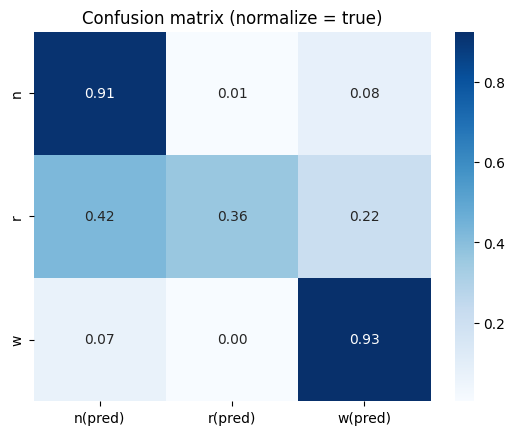

In [73]:
# Day 0
print("Day 0")
pred = np.argmax(y_pred_day0, axis=1)
test = y_test_day0

cm = np.array(confusion_matrix(test, pred))
print(cm)

cm = np.array(confusion_matrix(test, pred, normalize='true')) # normalize = 'true' or 'pred'
confusion = pd.DataFrame(cm, index=['n', 'r', 'w'], columns=['n(pred)', 'r(pred)', 'w(pred)'])

print(classification_report(test, pred, target_names=['n', 'r', 'w'], zero_division=0))

sns.heatmap(confusion, annot=True, cmap="Blues", fmt='.2f')
plt.title(f'Confusion matrix (normalize = true)')
plt.show()

Day 1
[[323547   1989  27964]
 [ 18923  17097   9756]
 [ 23269   1279 348911]]
              precision    recall  f1-score   support

           n       0.88      0.92      0.90    353500
           r       0.84      0.37      0.52     45776
           w       0.90      0.93      0.92    373459

    accuracy                           0.89    772735
   macro avg       0.88      0.74      0.78    772735
weighted avg       0.89      0.89      0.89    772735



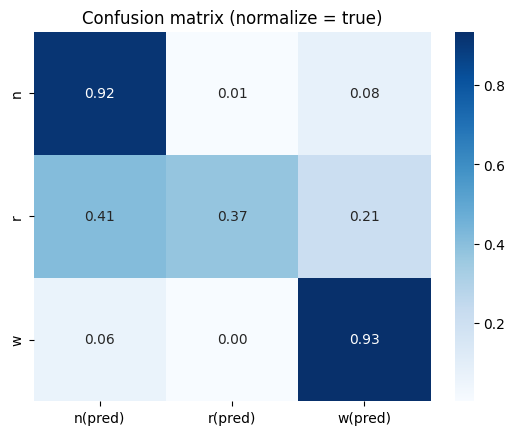

In [74]:
# Day 1
print("Day 1")
pred = np.argmax(y_pred_day1, axis=1)
test = y_test_day1

cm = np.array(confusion_matrix(test, pred))
print(cm)

cm = np.array(confusion_matrix(test, pred, normalize='true')) # normalize = 'true' or 'pred'
confusion = pd.DataFrame(cm, index=['n', 'r', 'w'], columns=['n(pred)', 'r(pred)', 'w(pred)'])

print(classification_report(test, pred, target_names=['n', 'r', 'w'], zero_division=0))

sns.heatmap(confusion, annot=True, cmap="Blues", fmt='.2f')
plt.title(f'Confusion matrix (normalize = true)')
plt.show()

Day 2
[[265423   7964   5179]
 [  4708  33981    632]
 [ 22596   6266 397883]]
              precision    recall  f1-score   support

           n       0.91      0.95      0.93    278566
           r       0.70      0.86      0.78     39321
           w       0.99      0.93      0.96    426745

    accuracy                           0.94    744632
   macro avg       0.87      0.92      0.89    744632
weighted avg       0.94      0.94      0.94    744632



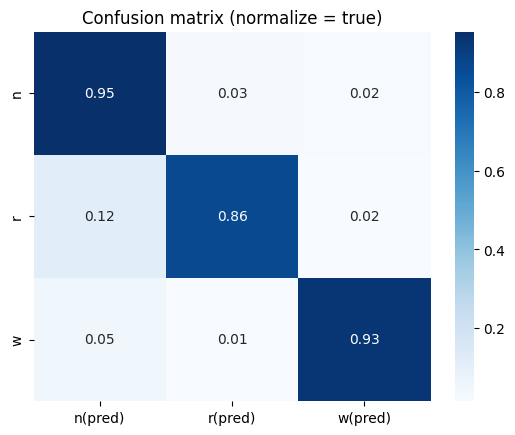

In [75]:
# Day 2
print("Day 2")
pred = np.argmax(y_pred_day2, axis=1)
test = y_test_day2

cm = np.array(confusion_matrix(test, pred))
print(cm)

cm = np.array(confusion_matrix(test, pred, normalize='true')) # normalize = 'true' or 'pred'
confusion = pd.DataFrame(cm, index=['n', 'r', 'w'], columns=['n(pred)', 'r(pred)', 'w(pred)'])

print(classification_report(test, pred, target_names=['n', 'r', 'w'], zero_division=0))

sns.heatmap(confusion, annot=True, cmap="Blues", fmt='.2f')
plt.title(f'Confusion matrix (normalize = true)')
plt.show()

Day 3


[[345468   6498   5999]
 [  9528  33855   1221]
 [ 33320   4303 329027]]
              precision    recall  f1-score   support

           n       0.89      0.97      0.93    357965
           r       0.76      0.76      0.76     44604
           w       0.98      0.90      0.94    366650

    accuracy                           0.92    769219
   macro avg       0.88      0.87      0.87    769219
weighted avg       0.92      0.92      0.92    769219



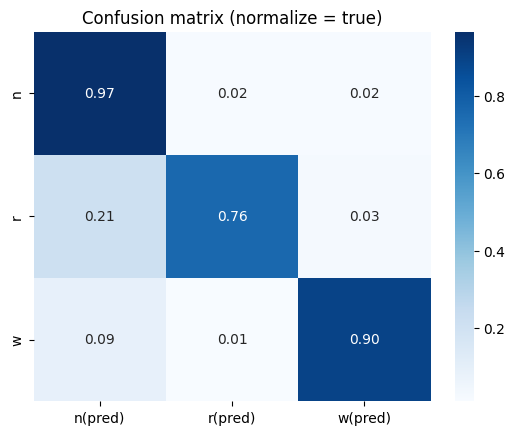

In [76]:
# Day 3
print("Day 3")
pred = np.argmax(y_pred_day3, axis=1)
test = y_test_day3

cm = np.array(confusion_matrix(test, pred))
print(cm)

cm = np.array(confusion_matrix(test, pred, normalize='true')) # normalize = 'true' or 'pred'
confusion = pd.DataFrame(cm, index=['n', 'r', 'w'], columns=['n(pred)', 'r(pred)', 'w(pred)'])

print(classification_report(test, pred, target_names=['n', 'r', 'w'], zero_division=0))

sns.heatmap(confusion, annot=True, cmap="Blues", fmt='.2f')
plt.title(f'Confusion matrix (normalize = true)')
plt.show()